## 3a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

$W_k = S_k \prod_{i=1}^{k-1}(1-S_i)$, donde $\{S_k\}_{k=1}^{\infty}$ es una secuencia de variables aleatorias independientes tal que $S_k$ proviene de una distribución $\operatorname{Beta}(1-\alpha,\theta+\alpha k)$.

Importamos las librerías/funciones necesarias.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Definimos las funciones que nos generan las secuencias $S_k$ y $W_k$ de forma parametrizada en $\alpha$ y $\theta$.

In [4]:
def simular_seq_S_k(k, alpha, theta):
    return np.array([beta(1-alpha, theta+alpha*i).rvs(1) for i in range(1, k+1)])

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1,k+1)])

Comprobamos mediante simulaciones que $W_k>0$ para todo número entero $k$ y que $\sum_{k=1}^{\infty}W_k = 1$. Dado que no podemos calcular la serie, veremos que las sumas parciales se aproximan a 1.

In [24]:
alpha = 0.5
theta = 2
n_ks = 1_000

In [31]:
sum_W_k = []
for i in range(1, n_ks, 30):
    if not np.all( simular_seq_W_k(i, alpha, theta) > 0 ):
        print(r'Existe $\W_k\leq0$')
    sum_W_k.append(simular_seq_W_k(i, alpha, theta).sum())

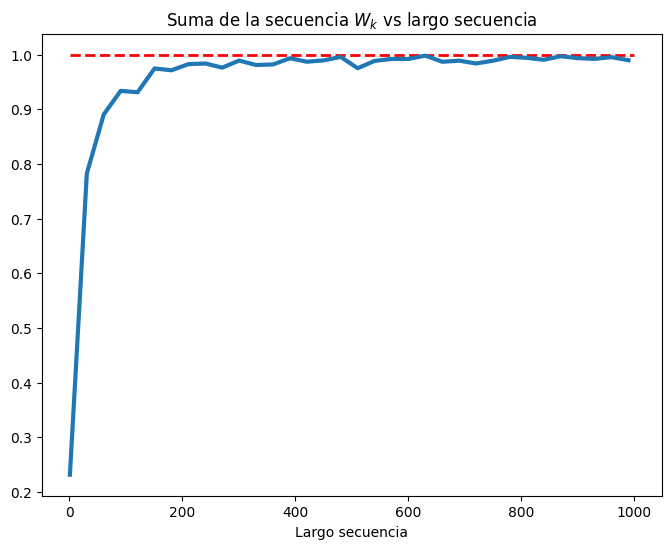

In [32]:
plt.figure(figsize=(8,6))
plt.plot([1,n_ks],[1,1], lw=2, c='r', ls='--')
plt.plot(range(1,n_ks,30), sum_W_k, lw=3)
plt.title(r'Suma de la secuencia $W_k$ vs largo secuencia')
plt.xlabel('Largo secuencia');